In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')

In [41]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


In [42]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average score                  0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [44]:
data.describe()

,math score,reading score,writing score,average score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,67.771667
std,15.569567,14.706436,15.226381,14.409003
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.666667
75%,77.000000,79.250000,79.000000,77.750000
max,100.000000,100.000000,100.000000,100.000000


In [45]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

Question 1

In [46]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

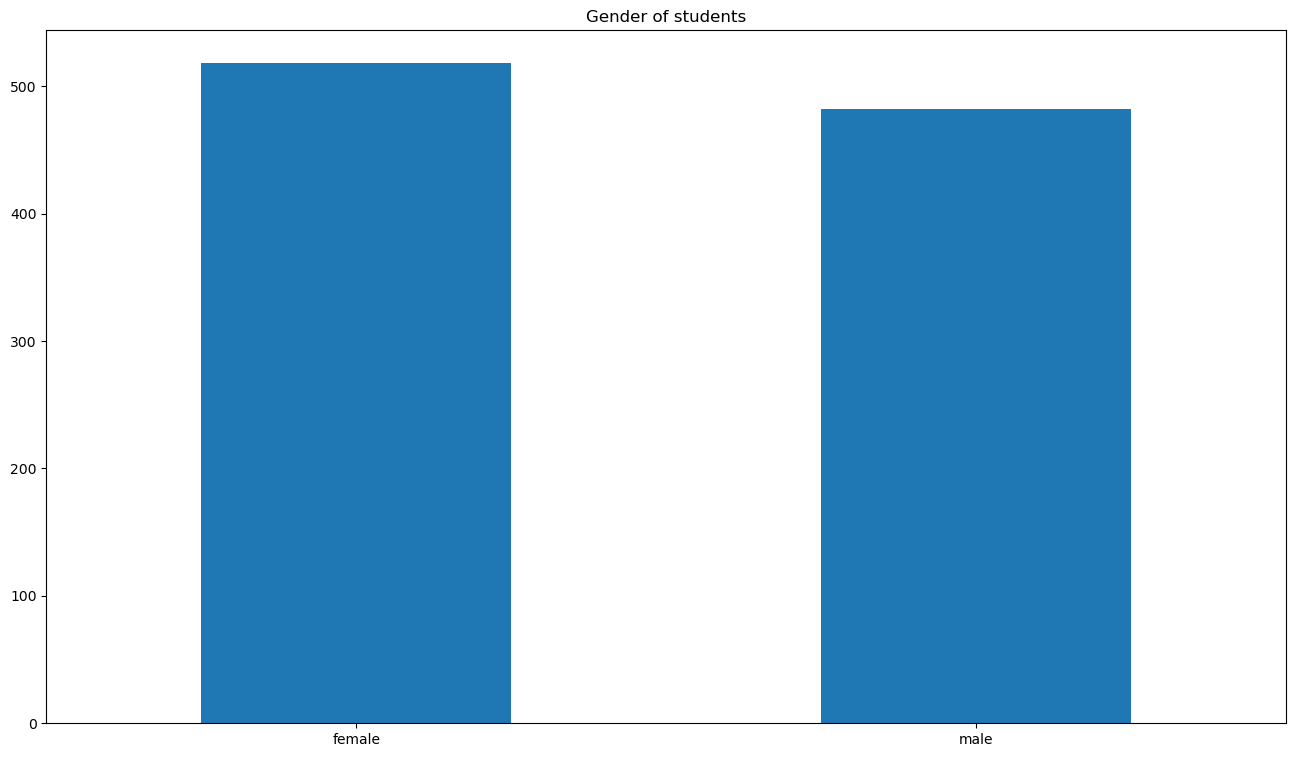

In [68]:
plt.subplot()
data['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()           

Question 2

In [47]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Question 3

In [48]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score']) / 3

In [50]:
pf['average score'].head()

0     9.000000
1    18.333333
2    26.000000
3    27.000000
4    31.333333
Name: average score, dtype: float64

In [52]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score',
     'average score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score  \
test preparation course gender                                             
completed               female   67.108696      78.793478      77.375000   
                        male     72.988506      70.339080      70.793103   
none                    female   61.320359      68.982036      69.955090   
                        male     66.467532      59.551948      62.581169   

                                average score  
test preparation course gender                 
completed               female      74.425725  
                        male        71.373563  
none                    female      66.752495  
                        male        62.866883

In [62]:
data2 = data.groupby(['gender','parental level of education','test preparation course'])[['reading score', 'math score', 'writing score']].mean()

In [63]:
data2

reading score  \
gender parental level of education test preparation course                  
female associate's degree          completed                    79.714286   
                                   none                         70.945946   
       bachelor's degree           completed                    80.681818   
                                   none                         75.463415   
       high school                 completed                    71.241379   
                                   none                         66.846154   
       master's degree             completed                    81.285714   
                                   none                         73.954545   
       some college                completed                    78.261905   
                                   none                         70.947368   
       some high school            completed                    74.942857   
                                   none                         65.303571   
male   associate's degree          completed                    72.950000   
                                   none                         64.393939   
       bachelor's degree           completed                    73.125000   
                                   none                         64.193548   
       high school                 completed                    64.925926   
                                   none                         59.973333   
       master's degree             completed                    76.833333   
                                   none                         73.823529   
       some college                completed                    74.400000   
                                   none                         60.808219   
       some high school            completed                    67.309524   
                                   none                         61.804348   

                                                            math score  \
gender parental level of education test preparation course               
female associate's degree          completed                 70.047619   
                                   none                      62.527027   
       bachelor's degree           completed                 71.000000   
                                   none                      66.634146   
       high school                 completed                 61.896552   
                                   none                      57.476923   
       master's degree             completed                 69.857143   
                                   none                      64.363636   
       some college                completed                 67.738095   
                                   none                      63.776316   
       some high school            completed                 63.600000   
                                   none                      55.767857   
male   associate's degree          completed                 74.225000   
                                   none                      68.984848   
       bachelor's degree           completed                 75.375000   
                                   none                      66.870968   
       high school                 completed                 69.296296   
                                   none                      62.866667   
       master's degree             completed                 77.333333   
                                   none                      75.705882   
       some college                completed                 76.942857   
                                   none                      65.561644   
       some high school            completed                 68.904762   
                                   none                      66.478261   

                                                            writing score  
gender parental level of education test preparation cour

In [64]:
data.describe()

,math score,reading score,writing score,average score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,67.771667
std,15.569567,14.706436,15.226381,14.409003
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.666667
75%,77.000000,79.250000,79.000000,77.750000
max,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='average score', ylabel='math score'>

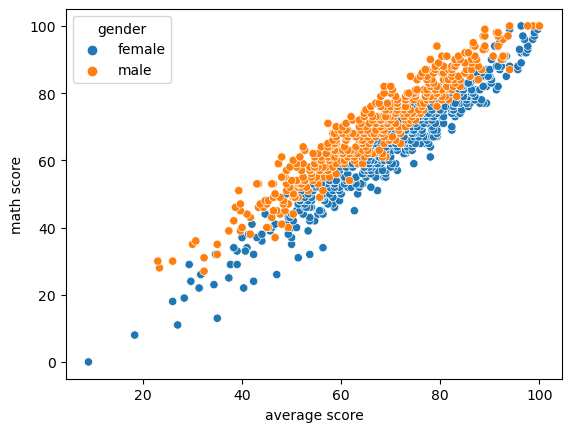

In [90]:
sns.scatterplot(x=data['average score'], y=data['math score'], hue = data['gender'])

<AxesSubplot:xlabel='average score', ylabel='reading score'>

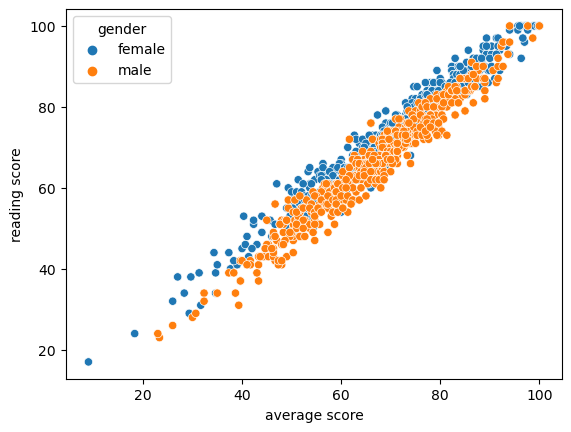

In [91]:
sns.scatterplot(x=data['average score'], y=data['reading score'], hue = data['gender'])

<AxesSubplot:xlabel='average score', ylabel='writing score'>

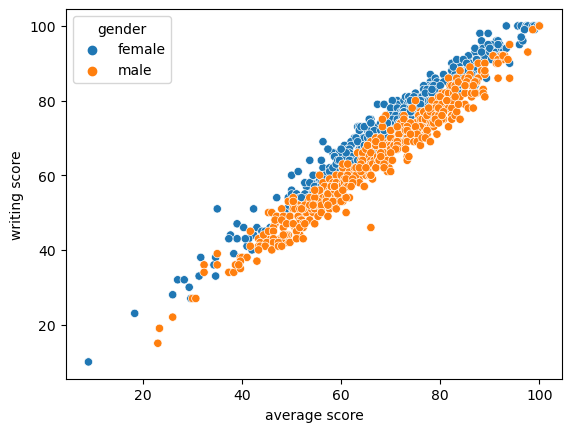

In [92]:
sns.scatterplot(x=data['average score'], y=data['writing score'], hue = data['gender'])

Question 5

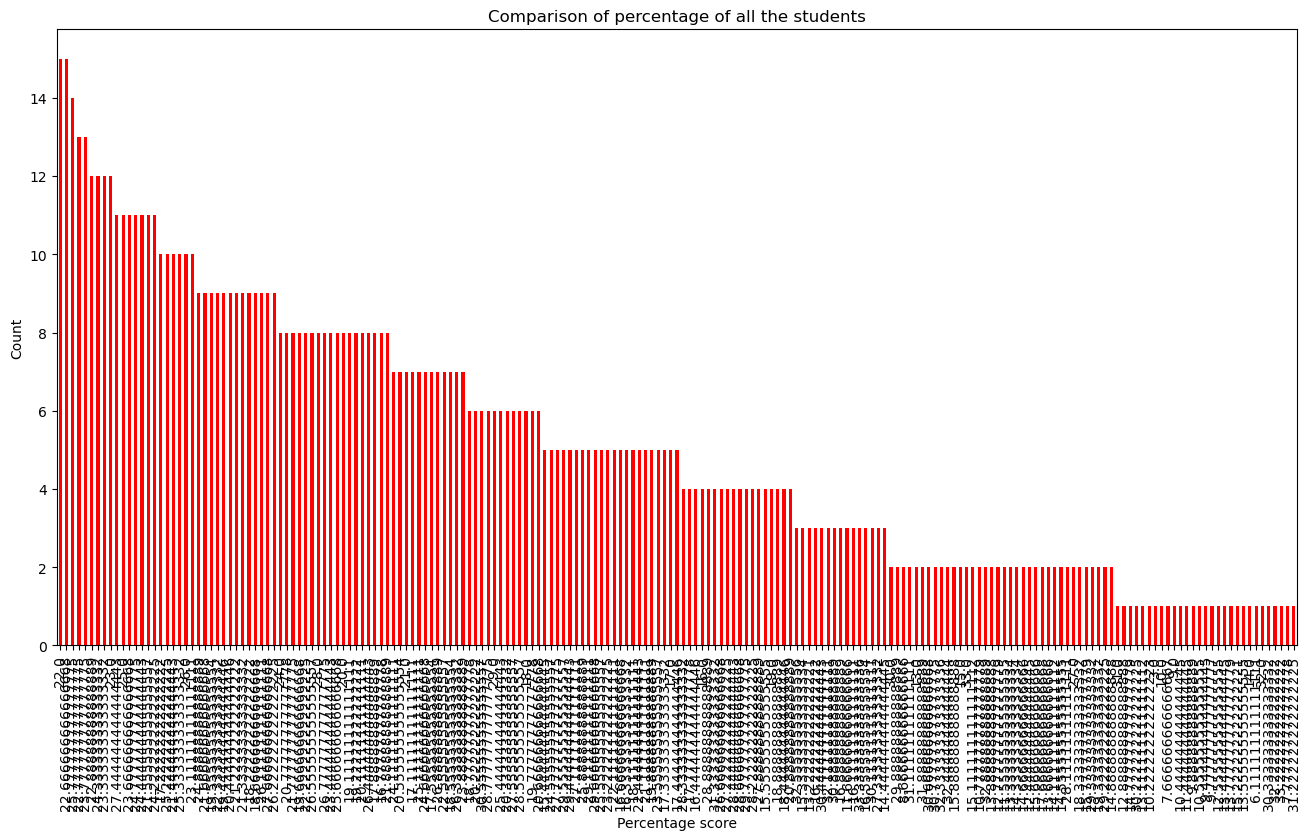

In [101]:
from math import *

data ['percentage'] = data['average score'] / 3

for i in range(0, 1000) :
        data['percentage'][i] = c(data['percentage'][i])
        
data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16,8), color = 'red')

plt.title('Comparison of percentage of all the students')
plt.xlabel('Percentage score')
plt.ylabel('Count')
plt.show()